# Temperatures of INDIA

## Краткое описание датасета

### (a)

В этом наборе данных представлена средняя месячная температура(числовые данные) в Индии с 1901 по 2017 года. Источник - https://www.geeksforgeeks.org/how-to-upload-a-dataset-in-jupyter-notebook/(Реальные данные)

## (b)

### Датасет включает в себя следующие атрибуты

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data_frame = pd.read_csv("../lab1, 1376, Осипов Лев Александрович/temperatures.csv")
data_frame.dtypes

YEAR         int64
JAN        float64
FEB        float64
MAR        float64
APR        float64
MAY        float64
JUN        float64
JUL        float64
AUG        float64
SEP        float64
OCT        float64
NOV        float64
DEC        float64
ANNUAL     float64
JAN-FEB    float64
MAR-MAY    float64
JUN-SEP    float64
OCT-DEC    float64
dtype: object

Атрибуты обозначают месяца в году
ANNUAL - среднегодовая температура

## Анализ атрибутов датасета

### (a) Среднее значение, ско
Для упрощения задачи возьмем только значения по месяцам

In [23]:
selected_columns = ['YEAR', 'JAN', 'FEB', 'MAR',
                    'APR', 'MAY', 'JUN',
                    'JUL', 'AUG', 'SEP',
                    'OCT', 'NOV']

df = data_frame[selected_columns]

mean_values = df.drop('YEAR', axis=1).mean()
std_values = df.drop('YEAR', axis=1).std()
print("Средние значения:")
print(mean_values)

print("\nСтандартное отклонение (ско):")
print(std_values)

Средние значения:
JAN    23.687436
FEB    25.597863
MAR    29.085983
APR    31.975812
MAY    33.565299
JUN    32.774274
JUL    31.035897
AUG    30.507692
SEP    30.486752
OCT    29.766581
NOV    27.285470
dtype: float64

Стандартное отклонение (ско):
JAN    0.834588
FEB    1.150757
MAR    1.068451
APR    0.889478
MAY    0.724905
JUN    0.633132
JUL    0.468818
AUG    0.476312
SEP    0.544295
OCT    0.705492
NOV    0.714518
dtype: float64


### (b) Построить гистограмму распределения значений, определить есть ли выбросы 

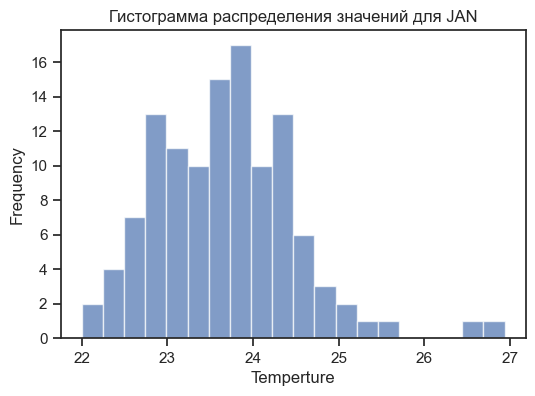

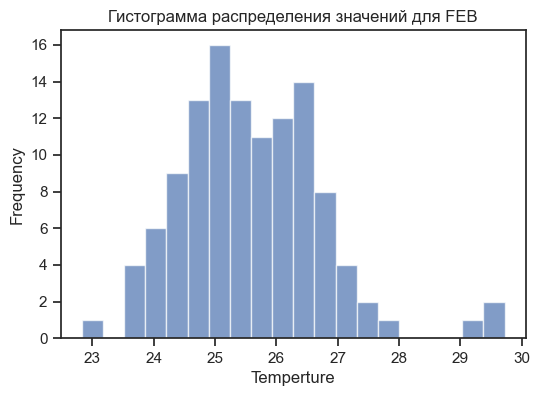

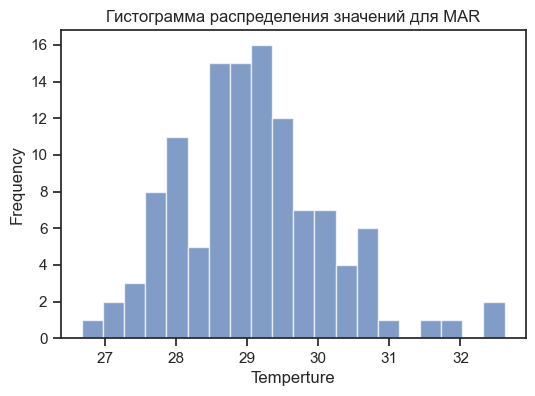

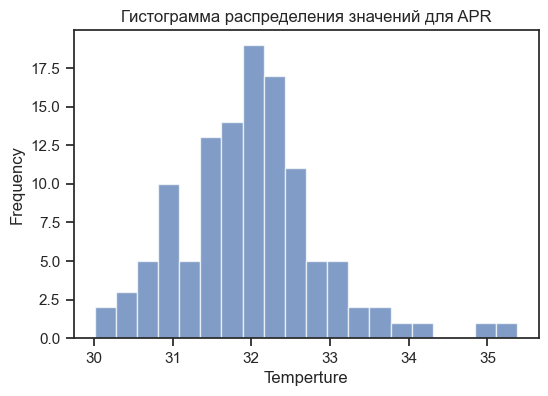

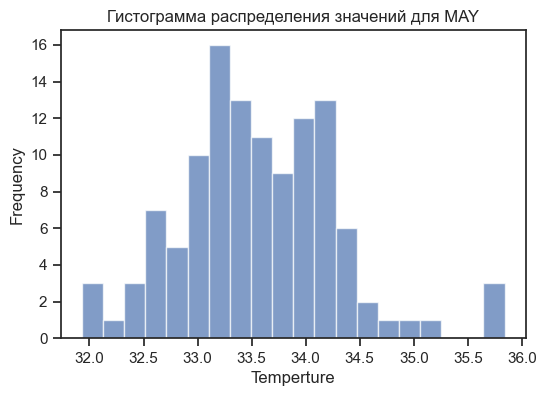

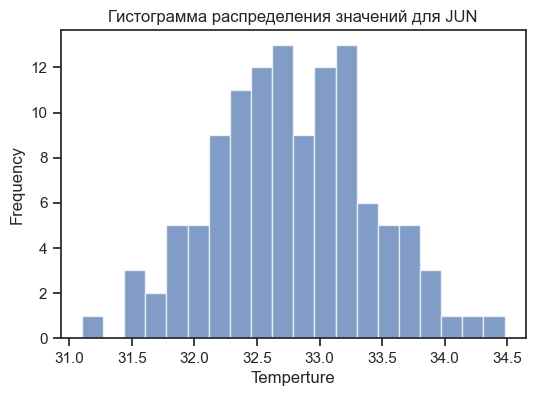

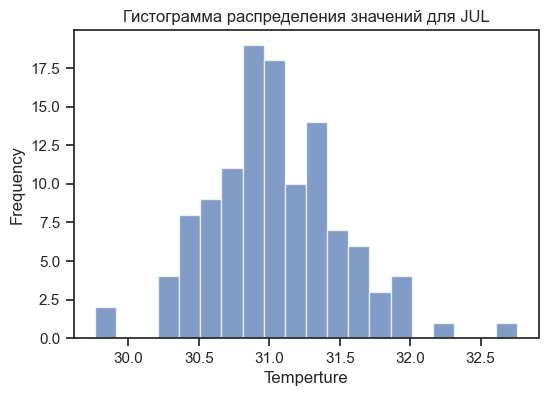

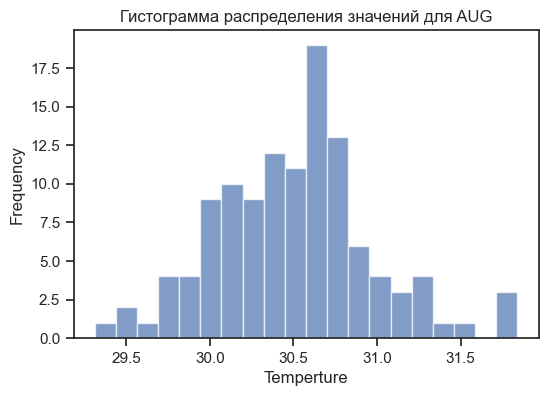

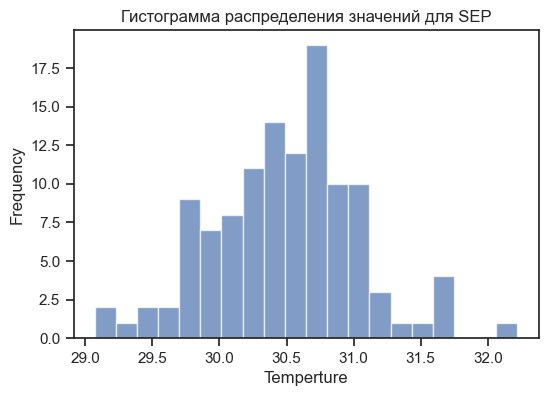

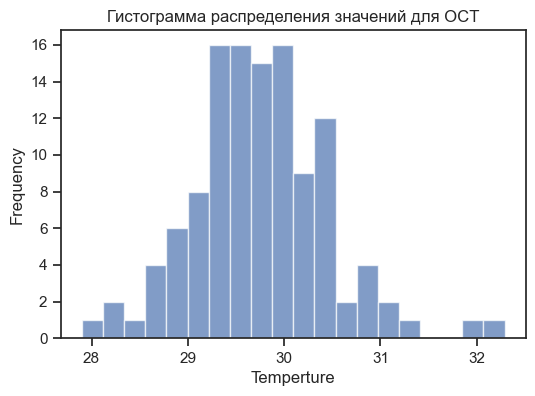

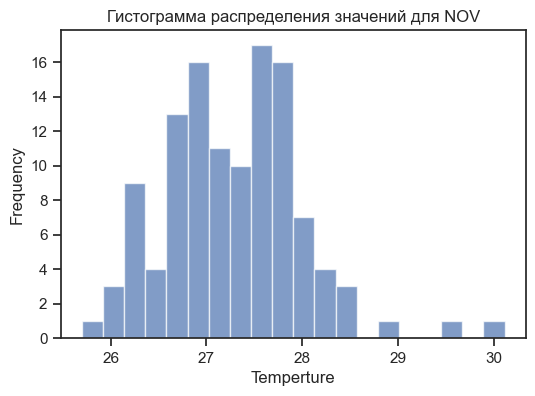

Количество выбросов в JAN : 2
Количество выбросов в FEB : 3
Количество выбросов в MAR : 4
Количество выбросов в APR : 4
Количество выбросов в MAY : 3
Количество выбросов в JUN : 1
Количество выбросов в JUL : 4
Количество выбросов в AUG : 3
Количество выбросов в SEP : 2
Количество выбросов в OCT : 3
Количество выбросов в NOV : 2


In [24]:
for column in df.drop('YEAR', axis=1).columns:
    plt.figure(figsize=(6, 4))
    plt.hist(df[column], bins=20, alpha=0.7)
    plt.title(f'Гистограмма распределения значений для {column}')
    plt.xlabel('Temperture')
    plt.ylabel('Frequency')
    plt.show()

for column in df.drop('YEAR', axis=1).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"Количество выбросов в {column} : {str(len(outliers))}")


### (c) Определим наличие пропущенных значений для каждого атрибута

In [25]:
for column in df.drop('YEAR', axis=1).columns:
    missing = df[column].isna().sum()
    print(f"Пропущенных значений в {column} : {missing}")

Пропущенных значений в JAN : 0
Пропущенных значений в FEB : 0
Пропущенных значений в MAR : 0
Пропущенных значений в APR : 0
Пропущенных значений в MAY : 0
Пропущенных значений в JUN : 0
Пропущенных значений в JUL : 0
Пропущенных значений в AUG : 0
Пропущенных значений в SEP : 0
Пропущенных значений в OCT : 0
Пропущенных значений в NOV : 0


### (d) Варианты обработки пропущенных значений

   + Заполнением пропущенных значений (NaN), например средним или медианой  
` df_normal = df.fillna(df.mean())`  
В некоторых случаях, заполнение пропущенных значений средним значением может быть разумным, особенно если пропущенные значения небольшое количество и несущественны для цели анализа. Однако важно тщательно оценить контекст и природу данных, а также рассмотреть альтернативные методы обработки пропущенных значений, такие как интерполяция

   + Интерполяцией пропущенных значений на основе соседних значений
df_interpolated = df.interpolate()



 *По умолчанию, interpolate() использует линейную интерполяцию, но можно задать и другие методы интерполяции, такие как "polynomial", "spline", "barycentric", и так далее, в зависимости от наших потребностей.*

## Определение корреляции между параметрами

### (a, b) Определим какие атрибуты высококоррелированы, а также характер корреляции

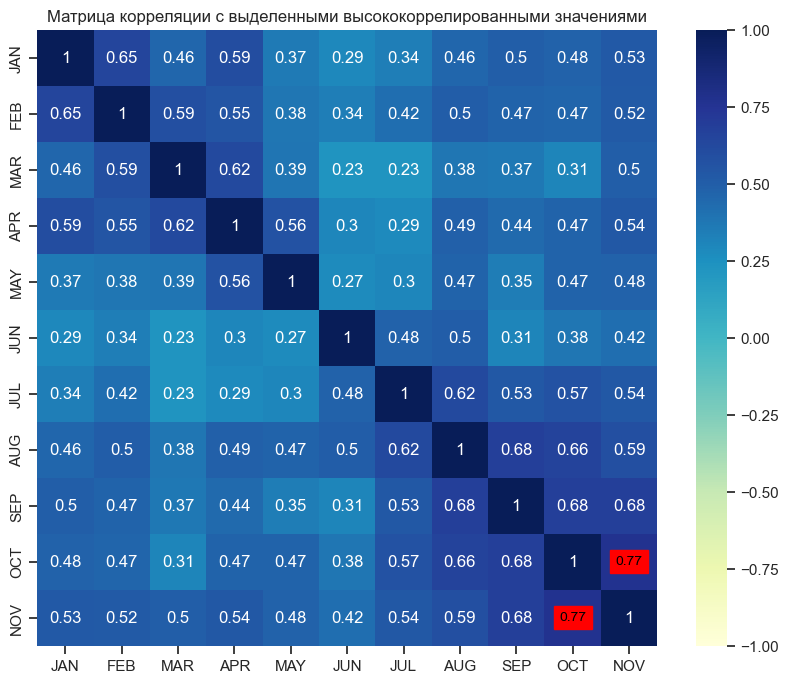

In [26]:
corr = df.drop('YEAR', axis=1).corr()

plt.figure(figsize=(10, 8))
plt.title("Матрица корреляции с выделенными высококоррелированными значениями")
sns.heatmap(corr, annot=True, cmap="YlGnBu", vmin=-1, vmax=1)


threshold = 0.7

for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        if i != j and (corr.iloc[i, j] >= threshold or corr.iloc[i, j] <= -threshold):
            plt.text(i+0.5, j+0.5, f"{corr.iloc[i, j]:.2f}", ha="center", va="center", fontsize=10, color="black", backgroundcolor="red")


plt.show()

### (a)

В данном случае мы получаем матрицу корреляции 'corr' (в последствии тепловую карту на ее основе с цветами желтый, зеленый, синий*), где каждый ее элемент представляет коэффициент корреляции Пирсона между соответствующими парами атрибутов (функция corr() может принимать параметр для определения метода корреляции, method{‘pearson’, ‘kendall’, ‘spearman’}, по умолчанию 'pearson'*). Коэффициент корреляции Пирсона может принимать значения от -1 до 1 и указывает на степень и направление линейной корреляции:

+ 1: Положительная линейная корреляция.
+ 0: Отсутствие линейной корреляции.
+ -1: Отрицательная линейная корреляция.  
Чем сильнее отклонение от 0, тем сильнее корреляция между парами. Для определения высококоррелированых атрибутов задали порог в 0,7 и -0,7 соответственно, а также добавили красный фон таким ячейкам. Данный порог выставляется по желанию, но зачастую используют именно такой.

### Характер кореляции

Наблюдаем положительную кореляцию между OCT и NOV. Это означает, что с увеличением средней температуры в октябре, повышается средняя температура в ноябре.

### (b)

Пары с кореляцией равной 0 отсутствуют.

### (c) Матрица графиков рассеивания

C:\Users\79117\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


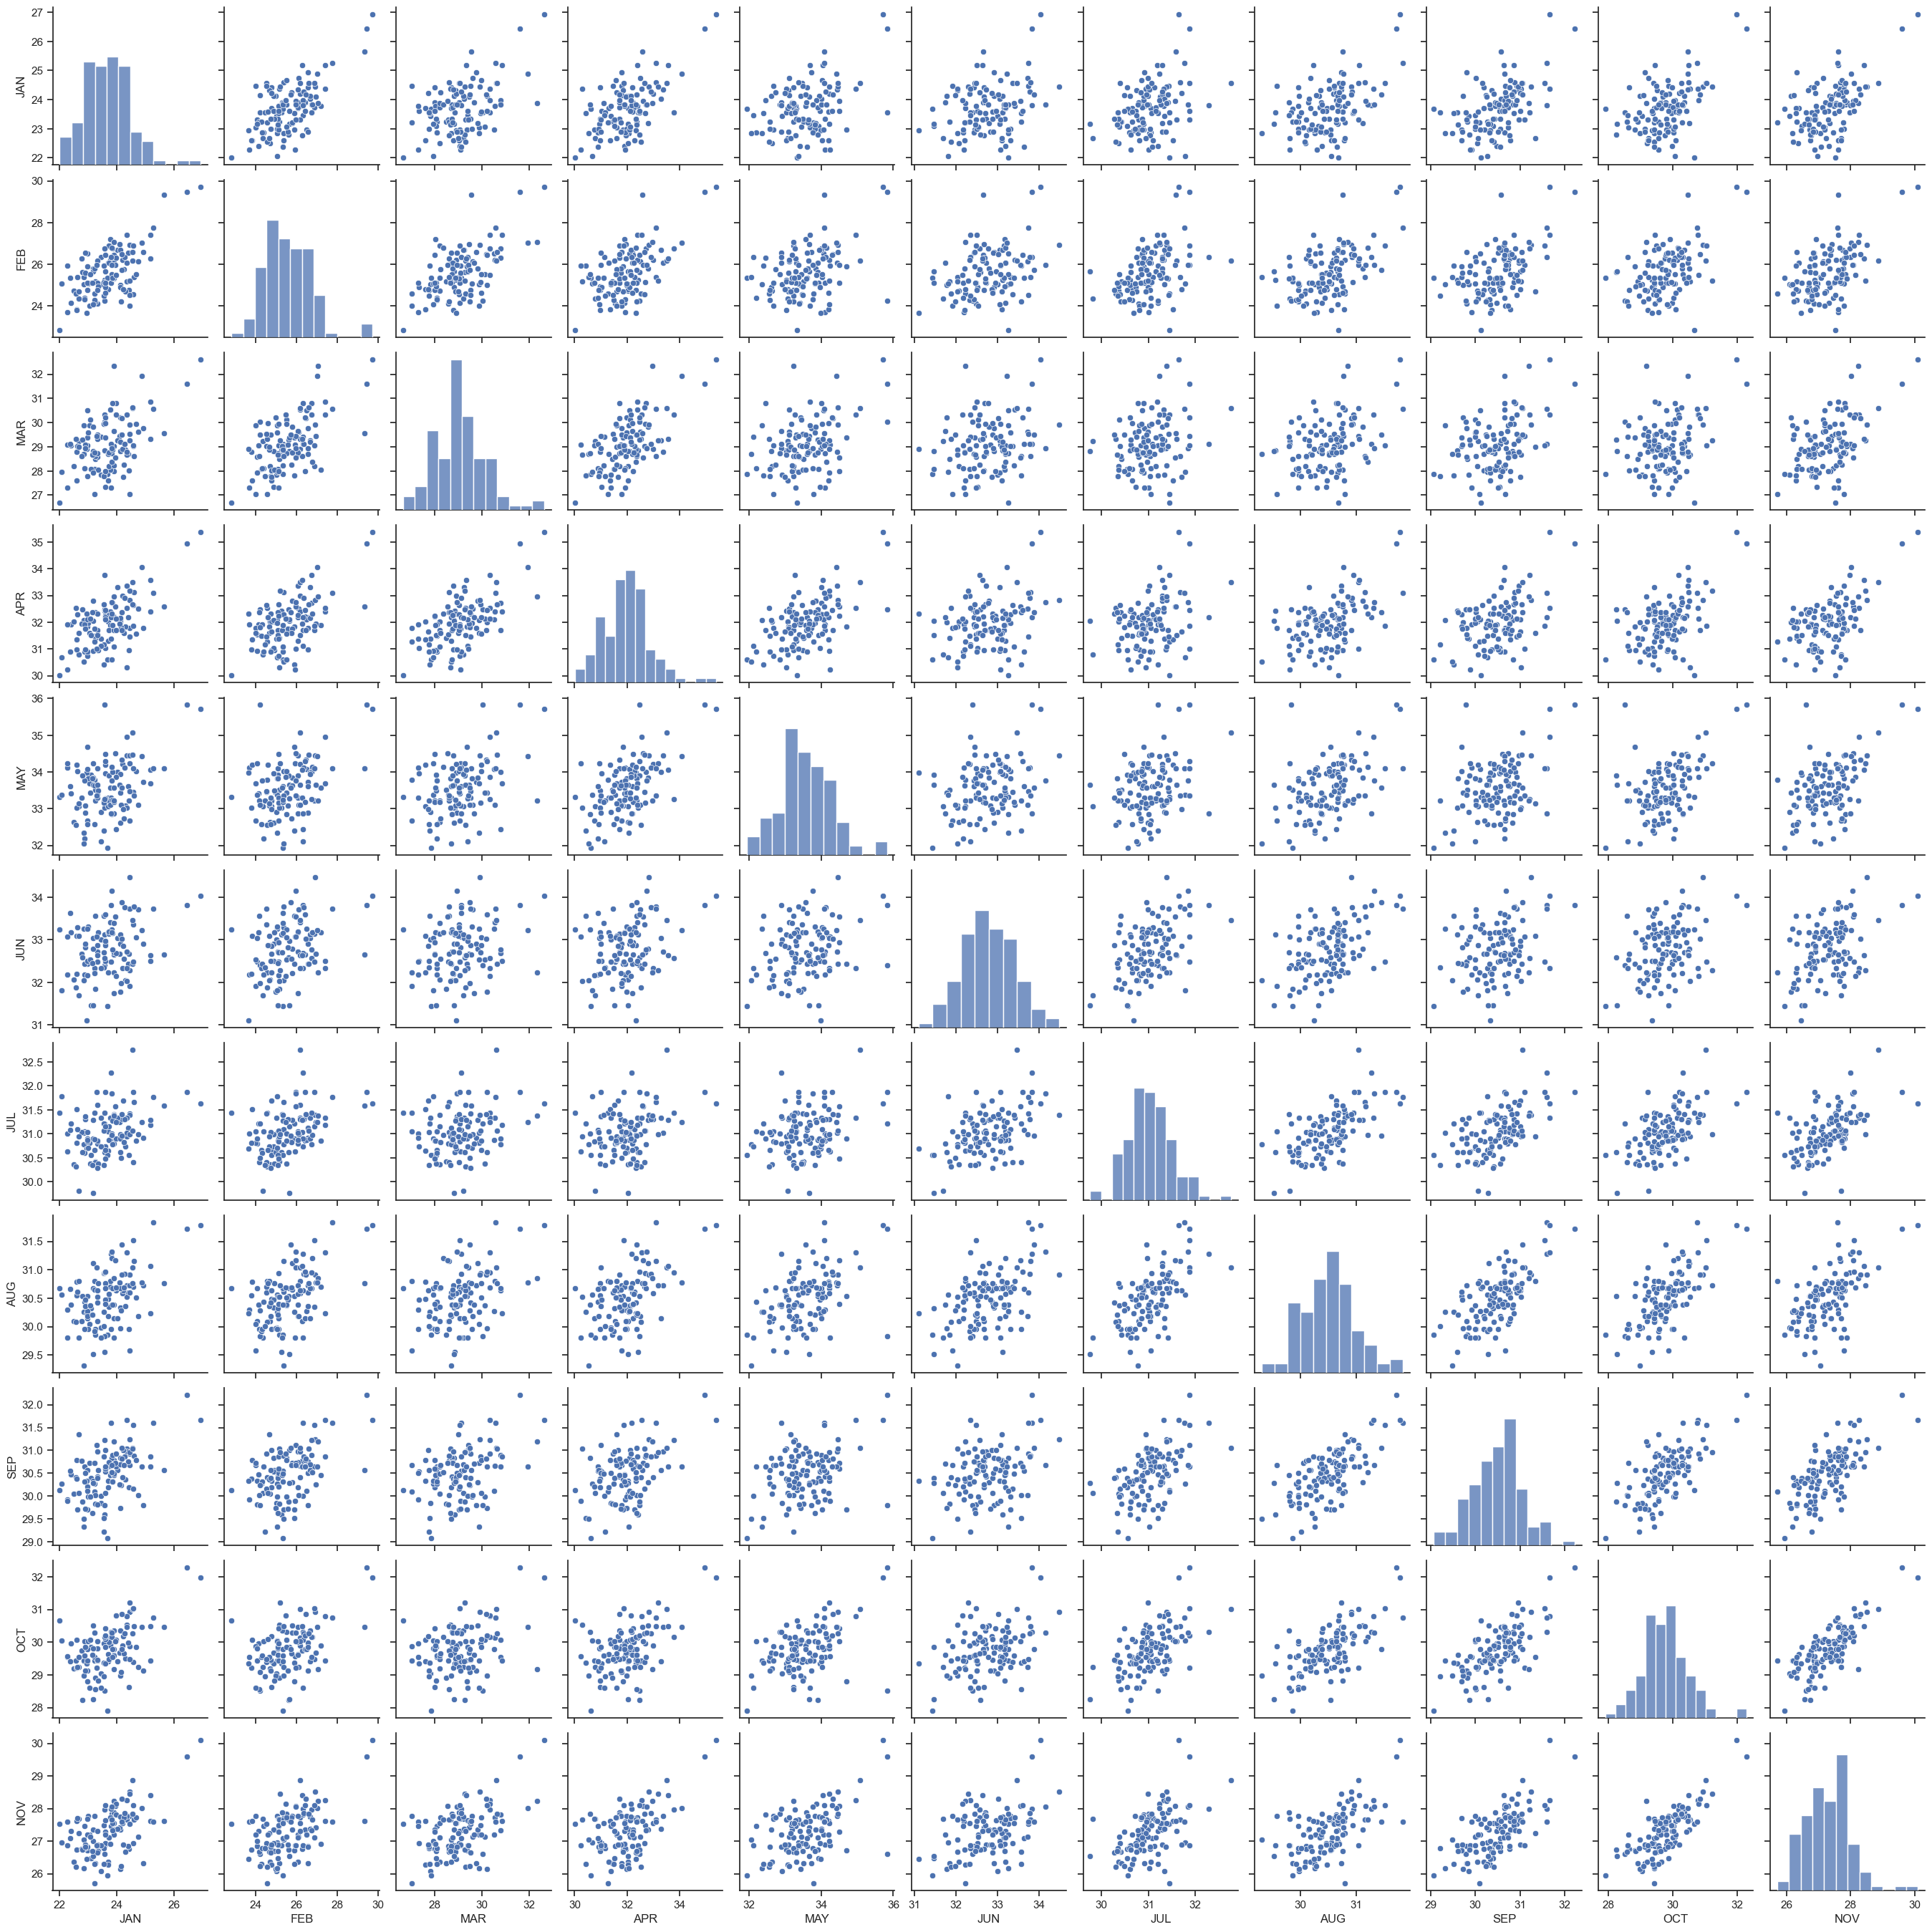

In [27]:
sns.set(style="ticks")
sns.pairplot(df.drop('YEAR', axis=1))
plt.show()

### (d) Анализ полученных результатов

В полученной матрице графиков рассеивания мы можем оценить степень связи между параметрами. Так в нашем случае, по графикам можно увидеть следующие закономерности:

+ Если точки формируют структуры произвольной округлой формы, то это говорит об отсутствии кореляции.
+ По мере приближения к концу/началу года кореляция стремится к линейной

Из полученных результатов можно сделать вывод что распределение измерений стремится к нормальному.



